In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df = df.drop(columns=['customerID'])

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [12]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
## check the distribution of target coloumn

In [14]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


### INSIGHTS
1. Customer Id is dropped from the dataset as it has no signficance with the goal.
2. There is no null value in the dataset left.
3. Null values in the total_charges column is replaced with 0
4. The target is imbalanced so upsampling is needed

In [15]:
### EDA

In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
## Numerical Feature Analysis

In [19]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of{column_name}")

  # calculate the mean and meadian for the column
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  ## draw vertical lines of mean and median
  plt.axvline(col_mean, color="red", linestyle="--",label="Mean")
  plt.axvline(col_median, color="green", linestyle="-",label="Median")

  plt.legend()
  plt.show()

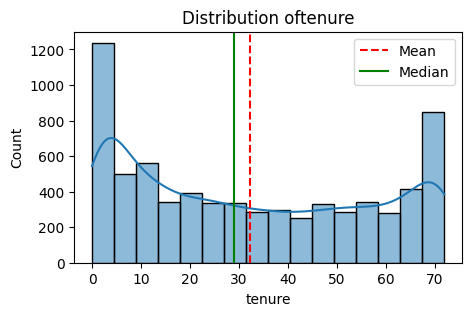

In [20]:
plot_histogram(df,"tenure")

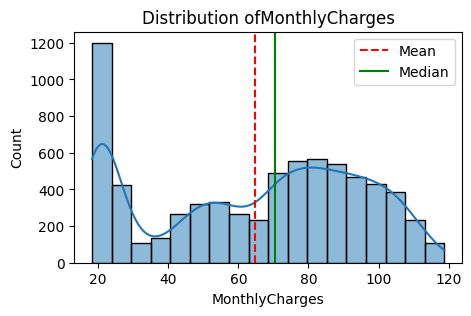

In [21]:
plot_histogram(df,"MonthlyCharges")

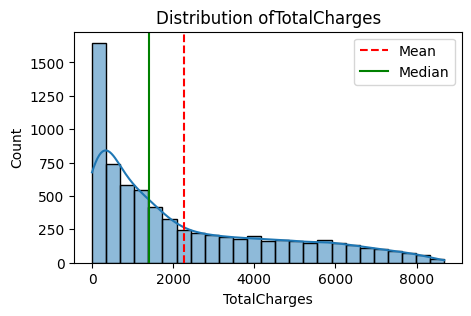

In [22]:
plot_histogram(df,"TotalCharges")

**Box PLot for Outlier detection**

In [23]:
def box_plot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Distribution of{column_name}")
  plt.ylabel(column_name)
  plt.show()

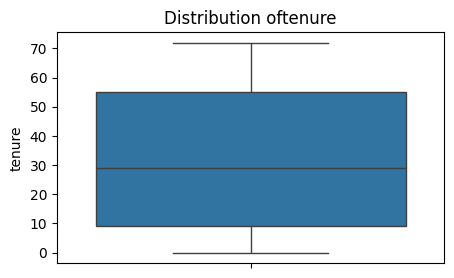

In [24]:
box_plot(df,"tenure")

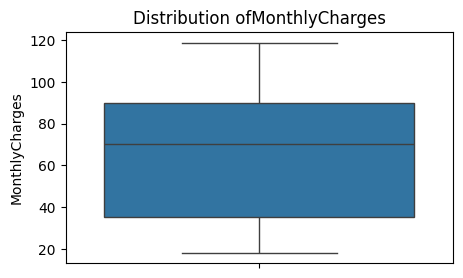

In [25]:
box_plot(df,"MonthlyCharges")

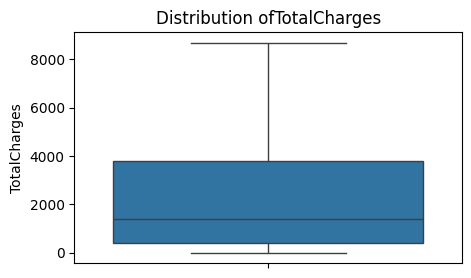

In [26]:
box_plot(df,"TotalCharges")

## Take Insight of correlation b/w numerical data

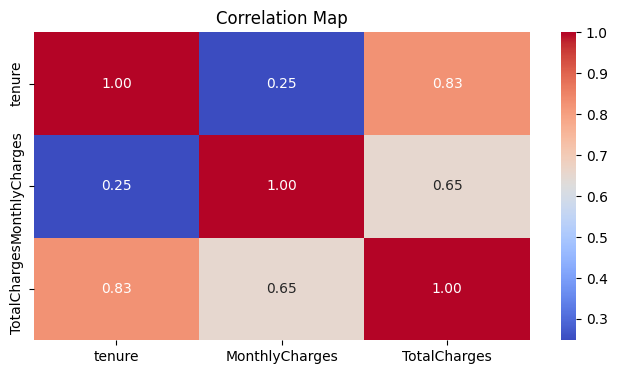

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),cmap="coolwarm",fmt=".2f",annot=True)
plt.title("Correlation Map")
plt.show()

In [28]:
## categorical analysis

In [29]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ['SeniorCitizen'] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

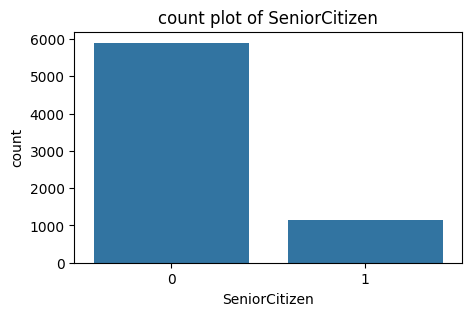

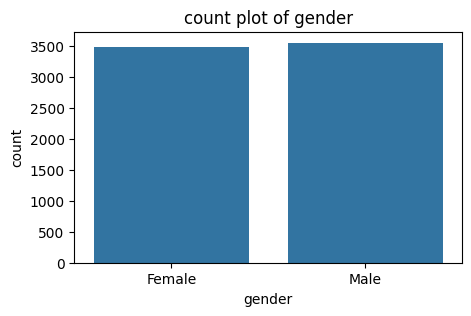

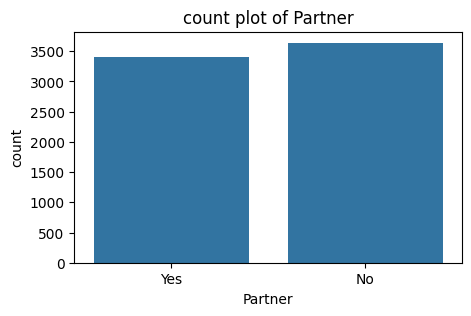

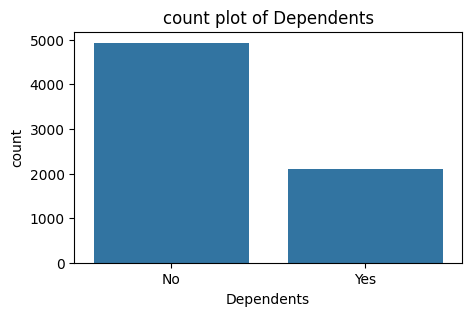

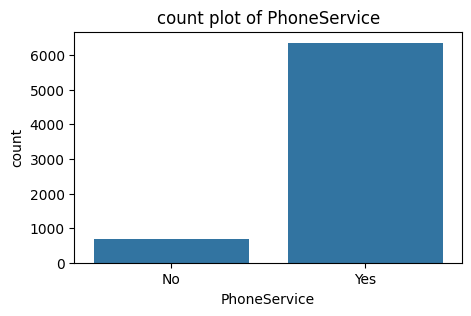

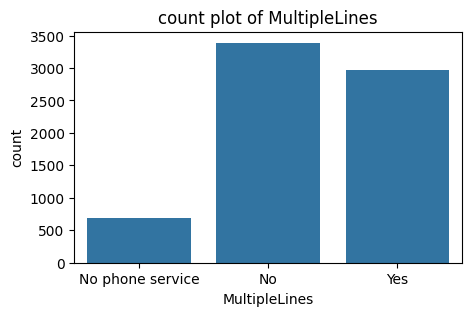

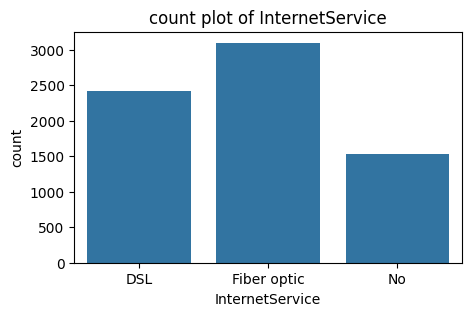

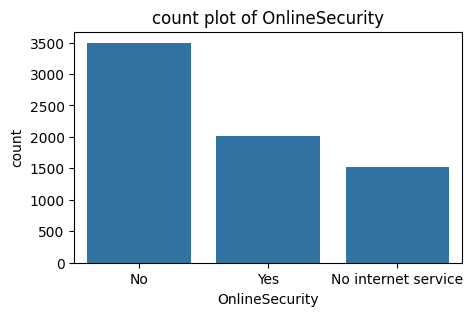

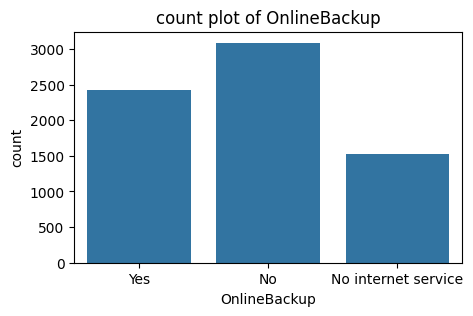

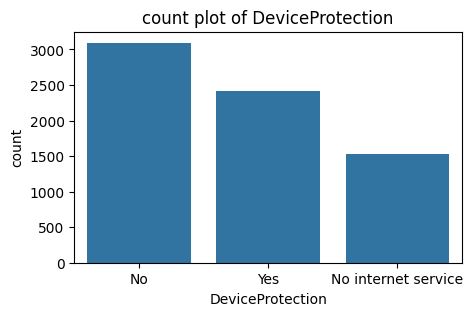

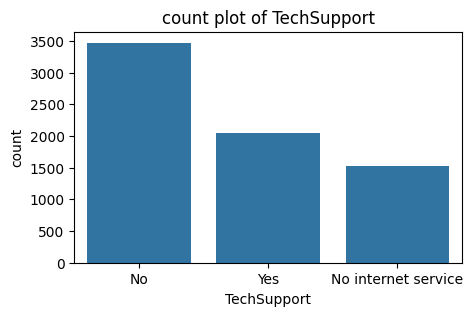

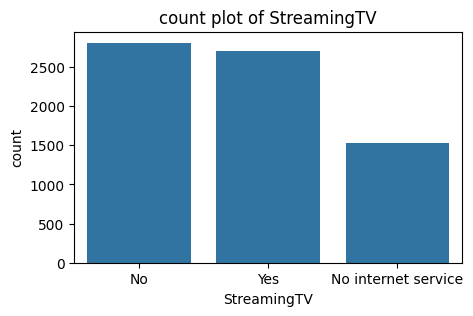

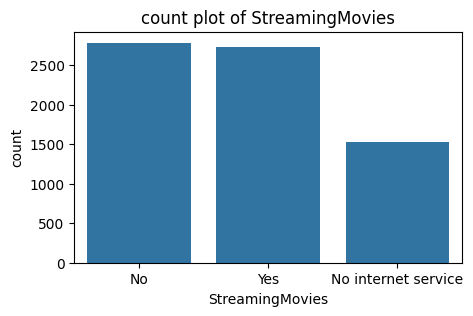

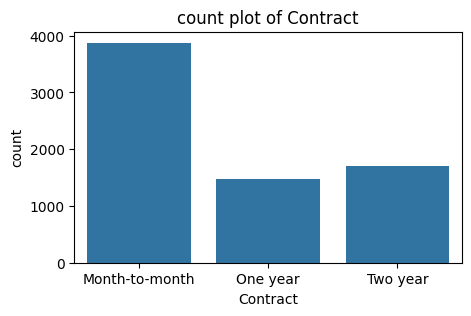

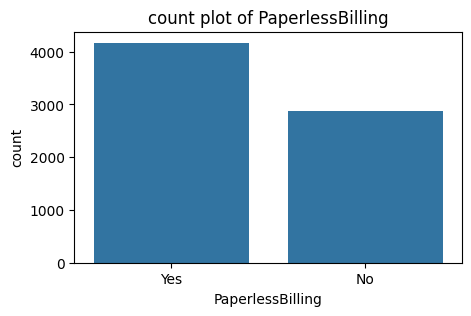

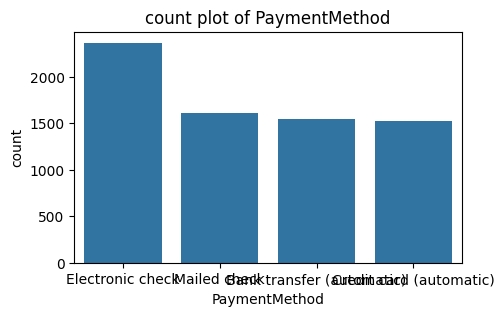

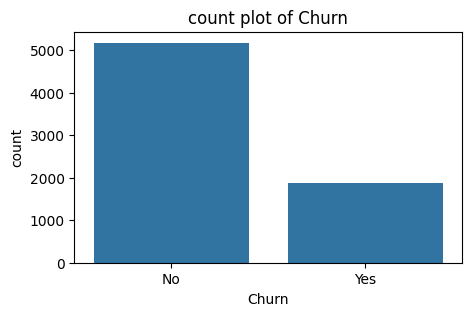

In [30]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"count plot of {col}")
  plt.show()

In [31]:
 ## DATa Preprocessing

In [32]:
## Label encoding for target column

In [33]:
df['Churn'] = df['Churn'].replace({'Yes': 1,'No' : 0})

/tmp/ipython-input-33-3700871727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1,'No' : 0})


In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [35]:
## label encoding for oject dtypes

In [36]:
obj_columns = df.select_dtypes(include="object").columns
obj_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [37]:
import pickle

In [38]:
encoders ={}

for col in obj_columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder

## save to pickle
with open("encoders.pkl","wb")as f:
  pickle.dump(encoders,f)

In [39]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [41]:
## split the data into train and test data

In [42]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [43]:
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [44]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(y_train)

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64


In [47]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [48]:
## synthetic oversampling as data imbalance

In [49]:
smote = SMOTE(random_state=42)

In [50]:
x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)

In [51]:
print(y_train.shape)

(5634,)


In [52]:
print(y_train_sm.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [53]:
## Model training with default hyperparameter

In [54]:
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42)
}

In [55]:
## perform 5 fold cross validation for each model
cv_scores ={}
for model_name,model in models.items():
    print(f"performing on {model_name}")
    scores = cross_val_score(model,x_train_sm,y_train_sm,cv=5,scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} average accuracy is: {np.mean(scores)}")
    print("--"*35)

performing on Decision Tree
Decision Tree average accuracy is: 0.7778026621130524
----------------------------------------------------------------------
performing on Random Forest
Random Forest average accuracy is: 0.8407582789672636
----------------------------------------------------------------------
performing on Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression average accuracy is: 0.79109016740371
----------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'Logistic Regression': array([0.72886473, 0.74380665, 0.8265861 , 0.81993958, 0.83625378])}

Random Forest gives the Highest Accuracy with default param

In [57]:
rfc = RandomForestClassifier(random_state = 42)

In [58]:
rfc.fit(x_train_sm,y_train_sm)

RandomForestClassifier(random_state=42)

In [59]:
## Model Evaluation

In [60]:
y_test.shape

(1409,)

In [61]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [62]:
y_pred = rfc.predict(x_test)

In [63]:
print("accuracy score:\n",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score:
 0.7785663591199432
confusion matrix:
 [[878 158]
 [154 219]]
classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [64]:
## save the trained model

In [65]:
model_data ={"model":rfc, "features_name": x.columns.to_list()}

with open("customer_churn_model.pkl","wb")as f:
  pickle.dump(model_data,f)

In [66]:
## Load the saved model and build a predictive system

In [67]:
with open("customer_churn_model.pkl","rb")as f:
  model_data = pickle.load(f)

  loaded_model = model_data["model"]
  features_name = model_data['features_name']


In [68]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [69]:
input_data = {
'gender': 'Female',
'SeniorCitizen': 0,
'Partner': 'Yes',
'Dependents': 'No',
'tenure': 1,
'PhoneService': 'No',
'MultipleLines': 'No phone service',
'InternetService': 'DSL',
'OnlineSecurity': 'No',
'OnlineBackup': 'Yes',
'DeviceProtection': 'No',
'TechSupport': 'No',
'StreamingTV': 'No',
'StreamingMovies': 'No',
'Contract': 'Month-to-month',
'PaperlessBilling': 'Yes',
'PaymentMethod': 'Electronic check',
'MonthlyCharges': 29.85,
'TotalCharges': 29.85}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl","rb")as f:
  encoders = pickle.load(f)

for col,encoder in encoders.items():
  input_data_df[col] = encoder.transform(input_data_df[col])

prediction = loaded_model.predict(input_data_df)
prediction_preb = loaded_model.predict_proba(input_data_df)

if prediction[0] == 0:
  print("Customer will not churn")
else:
  print("Customer will churn")
print(f"Probability of churn: {prediction_preb}")

Customer will not churn
Probability of churn: [[0.78 0.22]]
